## Sheet 16 - Root Finding Methods

In [7]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
# define the function
def f(h):
    y = h*np.sin(h) + 2*h -2
    return y

In [10]:
# set the variables
R = 2
V = 25

# analytical solution
ha = 2.68261

In [11]:
# set the interval
a = 0
b = 5.1

In [12]:
# set the error
e_set = 0.001
e = 10000

In [13]:
# 1a specific number of iterations given
x_n = []
e_abs = []
for i in range(0, 4):
    y1 = f(a) #-ve
    y2 = f(b) #+ve
    n = (a + b)/2
    y3 = f(n)
    if y1 * y3 < 0:
        b = n
    else:
        a = n
    x_n += [n]
    e_abs += [abs(ha - n)]
    
print(x_n)
print(e_abs)

[2.55, 1.275, 0.6375, 0.9562499999999999]
[0.13261000000000012, 1.40761, 2.04511, 1.7263600000000001]


In [7]:
x_n = []
error = []
while e > e_set:
    y1 = f(a) #-ve
    y2 = f(b) #+ve
    n = (a + b)/2
    y3 = f(n)
    if y1 * y3 < 0:
        b = n
    else:
        a = n
    x_n += [n]
    e = abs(ha - n)
    error += [e]
print(x_n)
print(error)
print(len(x_n)) # this is the number of iterations needed

[2.625, 2.6875, 2.65625, 2.671875, 2.6796875, 2.68359375]
[0.05760999999999994, 0.004890000000000061, 0.02635999999999994, 0.010734999999999939, 0.002922499999999939, 0.000983750000000061]
6


### 1c False Position Method

In [8]:
R = 2
a = 0
b = 2*R

In [9]:
xc = []
for i in range(0, 4):
    c = b - (f(b)*(b-a))/(f(b) - f(a))
    if f(a)*f(c) < 0:
        b = c
    else:
        a = c
    xc += [c]
print(xc)

[2.984155182973038, 2.6526563816657007, 2.6847115256199277, 2.682620801357509]


In [10]:
x = np.arange(0, 4, 0.01)
y = f(x)

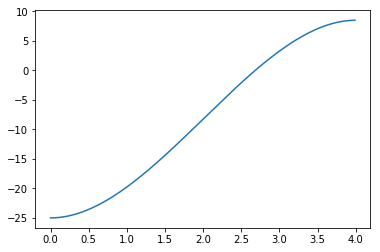

In [11]:
plt.plot(x, y)

### 1e Newton Raphson Method (w/ analytical differentiation)

In [12]:
# f(x)
def func(a):
    return (np.pi*a**2)*((6-a)/3)-25

In [38]:
# derivative of f(x)
def fprime(a):
    return 2*np.pi*a((6-a)/3) - np.pi*(a**2)/3

In [39]:
def NewtonRaphson(N,a0,er):

    e, n = 1e6, 1
    a = a0
    aOld = 0
    print(f"It {0}, an = {round(a0,5)}, f(a) = {round(func(a),5)}, fprime(a) = {round(fprime(a),5)}, e_r = {round(e,5)}")
    while (abs(e) > er) and (n < N): #two limits in case the algorithm diverges
        aOld = a
        a -= (func(a) / fprime(a))
        e = ((a-aOld)/a)*100
        print(f"It {n}, an = {round(a,5)}, f(a) = {round(func(a),5)}, fprime(a) = {round(fprime(a),5)}, e_r = {round(e,5)}")
        n += 1
        continue
    print()
    return



In [40]:
NewtonRaphson(100, 3.98, 0.05)

TypeError: 'float' object is not callable

In [14]:
def NewtonRaphsonOptimisation(N,a0,er, h_true):

    e, n = 1e6, 1
    a = a0
    aOld = 0
    h = 0
    print(f"It {0}, an = {round(a0,5)}, func(a) = {round(func(a),5)}, fprime(a) = {round(fprime(a),5)}, h = {round(h,5)}, e_r = {round(e,5)}")
    while (abs(e) > er) and (n < N): #two limits in case the algorithm diverges
        aOld = a
        a -= (func(a) / fprime(a))
        h = (1-a)/6
        e = ((h-h_true)/h_true)*100
        print(f"It {n}, an = {round(a,5)}, func(a) = {round(func(a),5)}, fprime(a) = {round(fprime(a),5)}, h = {round(h,5)} e_r = {round(e,5)}")
        n += 1
        continue
    print()
    return



In [15]:
NewtonRaphsonOptimisation(100, 1, 0.05, 1/6)
# (iterations, starting x value, relative error percentage, true h value for optimisation)

It 0, an = 1, func(a) = -12, fprime(a) = -28, h = 0, e_r = 1000000.0
It 1, an = 0.57143, func(a) = -3.77843, fprime(a) = -11.83673, h = 0.07143 e_r = -57.14286
It 2, an = 0.25222, func(a) = -1.13722, fprime(a) = -5.52672, h = 0.12463 e_r = -25.22167
It 3, an = 0.04645, func(a) = -0.1866, fprime(a) = -4.05178, h = 0.15893 e_r = -4.64488
It 4, an = 0.0004, func(a) = -0.00158, fprime(a) = -4.0, h = 0.1666 e_r = -0.03957



It 1, h = 2, e_r = -0.56674
It 2, h = 1.27653, e_r = -0.32497
It 3, h = 0.96344, e_r = -0.49948
It 4, h = 0.64252, e_r = -0.58997
It 5, h = 0.40411, e_r = -0.98636
It 6, h = 0.20344, e_r = -2.20511
It 7, h = 0.06347, e_r = -9.28203
It 8, h = 0.00617, e_r = -113.1105
It 9, h = 5e-05, e_r = -13006.08912
It 10, h = 0.0, e_r = -170825968.21712


ZeroDivisionError: float division by zero

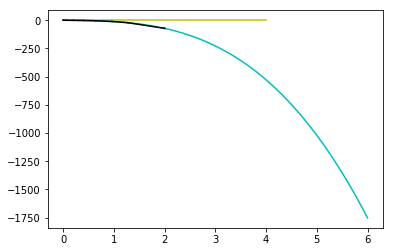

In [17]:
def Secant(N,h0,er):

    e, n = 1e6, 1
    h, hOld = h0, h0 - 0.01
    f, fOld = func(h), func(hOld)
    
    while (abs(e) > er) and (n < N):

        plt.plot([h,hOld],[f,fOld],"k-")
        
        h, hOld = h - func(h)*(hOld - h) / (fOld - f) , h
        f, fOld = func(h), f
        
        e = (h-hOld)/h
        
        print(f"It {n}, h = {round(hOld,5)}, e_r = {round(e,5)}")
        n += 1
        continue
    print()
    return

Xrange = np.linspace(0,6,100)
plt.plot([0,4],[0,0],"y-")
plt.plot(Xrange, func(Xrange), "c-")

Secant(100,2, 0.01)
##Secant(100,2*1.99, 0.01)

plt.show()